In [5]:
import netCDF4 as nc
import matplotlib.pyplot as plt

# Open the NetCDF file
file_path = './dotnc/raw/pr.nc'  # Update with your NetCDF file path
dataset = nc.Dataset(file_path)

# Assume 'lat', 'lon', and 'precipitation_amount' are the variable names in your NetCDF file
latitudes = dataset.variables['lat'][:]
longitudes = dataset.variables['lon'][:]
precipitation_amount = dataset.variables['precipitation_amount'][:]  # Adjust according to your file

# Select a specific time step (for example, the first time step)
# Assuming the dimensions are (time, latitude, longitude)
# Change the index [0] to whatever time step you want to visualize
precipitation_slice = precipitation_amount[0, :, :]  # Select the first time step

dataset.close()




Latitudes shape: (585,)
Longitudes shape: (1386,)
Precipitation shape: (585, 1386)


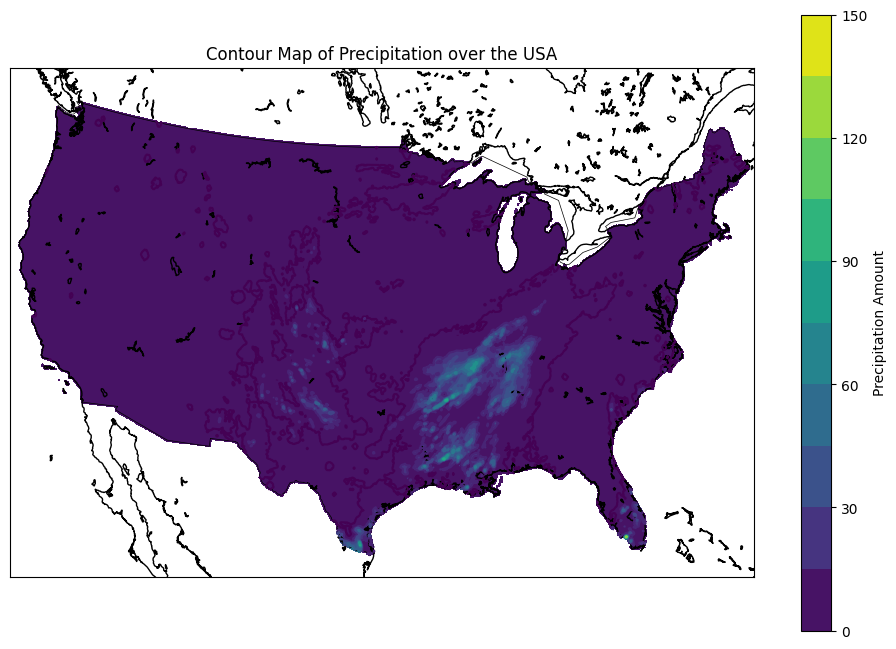

In [6]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Open the NetCDF file
file_path = './dotnc/raw/pr.nc'  # Update with your NetCDF file path
dataset = nc.Dataset(file_path)

# Assume 'lat', 'lon', and 'precipitation_amount' are the variable names in your NetCDF file
latitudes = dataset.variables['lat'][:]
longitudes = dataset.variables['lon'][:]
req_thing = 'precipitation_amount'

# req_thing = 'specific_humidity'
precipitation_amount = dataset.variables[req_thing][:]  # Adjust according to your file

# Select a specific time step (for example, the first time step)
precipitation_slice = precipitation_amount[0, :, :]  # Select the first time step

# Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
print('Latitudes shape:', latitudes.shape)
print('Longitudes shape:', longitudes.shape)
print('Precipitation shape:', precipitation_slice.shape)

# Create a Basemap instance
plt.figure(figsize=(12, 8))
m = Basemap(projection='lcc', resolution='i', 
            lat_0=37.5, lon_0=-96,
            llcrnrlon=-119, urcrnrlon=-64, 
            llcrnrlat=22, urcrnrlat=50)

# Draw coastlines and states
m.drawcoastlines()
# m.drawstates()
m.drawcountries()

# Convert lat/lon to map projection coordinates
# Use np.meshgrid to create 2D arrays of coordinates
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)
x, y = m(lon_grid, lat_grid)

# Create contour map
contour = m.contour(x, y, precipitation_slice, levels=10, cmap='viridis')
contour = m.contourf(x, y, precipitation_slice, levels=10, cmap='viridis')
plt.colorbar(contour, label='Precipitation Amount')

# Add labels to the contours
plt.clabel(contour, inline=True, fontsize=8, fmt='%1.111f')

plt.title('Contour Map of Precipitation over the USA')
plt.show()

dataset.close()


Latitudes shape: (585,)
Longitudes shape: (1386,)
Precipitation shape: (585, 1386)


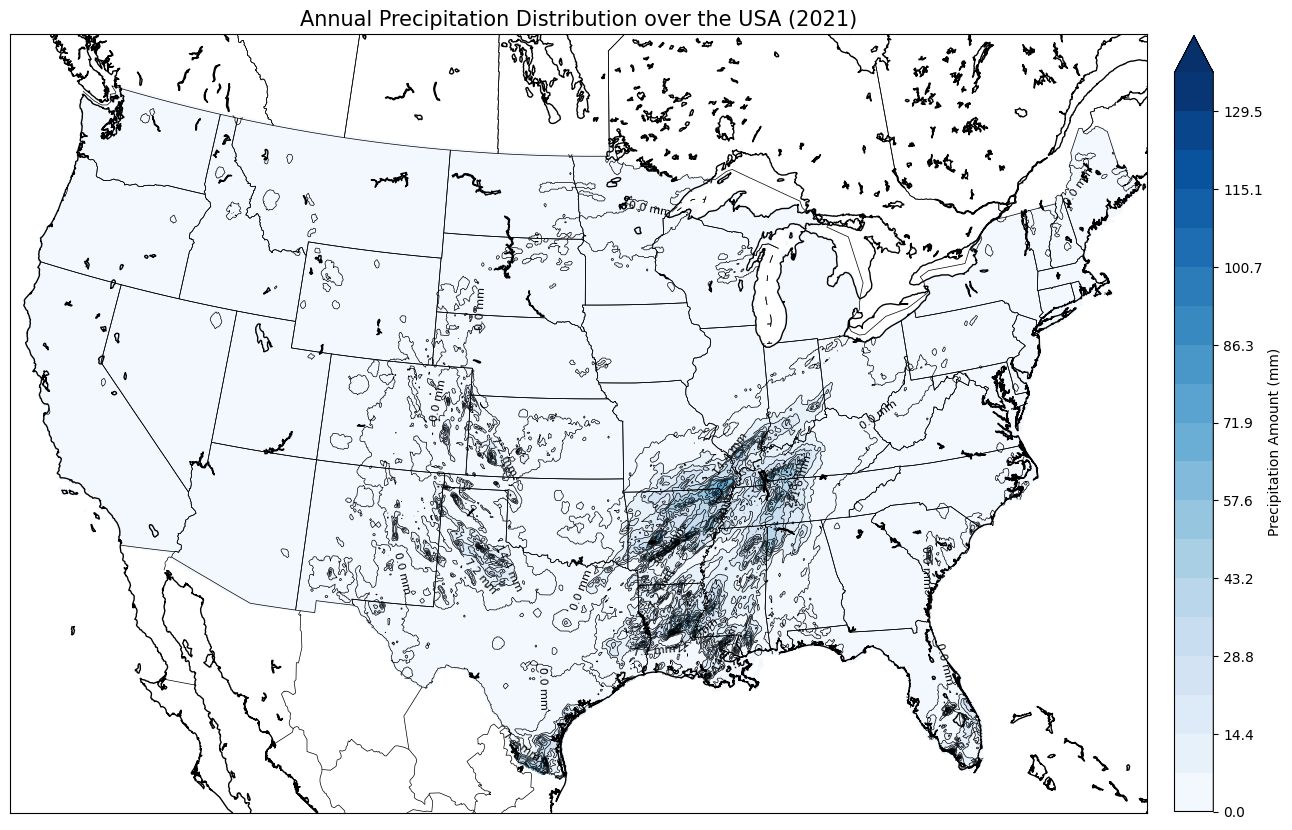

In [7]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Open the NetCDF file
file_path = './dotnc/raw/pr.nc'  # Update with your NetCDF file path
dataset = nc.Dataset(file_path)

# Assume 'lat', 'lon', and 'precipitation_amount' are the variable names in your NetCDF file
latitudes = dataset.variables['lat'][:]
longitudes = dataset.variables['lon'][:]
req_thing = 'precipitation_amount'

# req_thing = 'specific_humidity'
precipitation_amount = dataset.variables[req_thing][:]  # Adjust according to your file

# Select a specific time step (for example, the first time step)
precipitation_slice = precipitation_amount[0, :, :]  # Select the first time step

# Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
print('Latitudes shape:', latitudes.shape)
print('Longitudes shape:', longitudes.shape)
print('Precipitation shape:', precipitation_slice.shape)

# Create a Basemap instance
plt.figure(figsize=(14, 10))
m = Basemap(projection='lcc', resolution='i', 
            lat_0=37.5, lon_0=-96,
            llcrnrlon=-119, urcrnrlon=-64, 
            llcrnrlat=22, urcrnrlat=50)

# Draw coastlines, states, and country boundaries for context
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Convert lat/lon to map projection coordinates
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)
x, y = m(lon_grid, lat_grid)

# Define a colormap and contour levels for precipitation
cmap = 'Blues'  # Use a blue-based colormap for intuitive rain representation
levels = np.linspace(np.min(precipitation_slice), np.max(precipitation_slice), 20)  # Smoother contour levels

# Create filled contour map with the specified colormap and levels
contourf = m.contourf(x, y, precipitation_slice, levels=levels, cmap=cmap, extend='max')
contour = m.contour(x, y, precipitation_slice, levels=levels, colors='black', linewidths=0.5)

# Add color bar with better labeling
cbar = plt.colorbar(contourf, orientation='vertical', pad=0.02, shrink=0.8, label='Precipitation Amount (mm)')
cbar.ax.tick_params(labelsize=10)

# Label the contours with precipitation values
plt.clabel(contour, inline=True, fontsize=8, fmt='%1.1f mm')

# Add a descriptive title with context
plt.title('Annual Precipitation Distribution over the USA (2021)', fontsize=15)

# Show plot
plt.tight_layout()
plt.show()

# Close the dataset
dataset.close()


In [8]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Open the NetCDF file
file_path = './dotnc/raw/pr.nc'  # Update with your NetCDF file path
dataset = nc.Dataset(file_path)

# Assume 'lat', 'lon', and 'precipitation_amount' are the variable names in your NetCDF file
latitudes = dataset.variables['lat'][:]
longitudes = dataset.variables['lon'][:]
req_thing = 'precipitation_amount'

# Fetch the precipitation data
precipitation_amount = dataset.variables[req_thing][:]  # Adjust according to your file

# Select a specific time step (for example, the first time step)
precipitation_slice = precipitation_amount[162, :, :]  # Select the first time step

# Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
print('Latitudes shape:', latitudes.shape)
print('Longitudes shape:', longitudes.shape)
print('Precipitation shape:', precipitation_slice.shape)

# Create a Basemap instance
plt.figure(figsize=(14, 10))
# m = Basemap(projection='lcc', resolution='i', 
#             lat_0=37.5, lon_0=-96,
#             llcrnrlon=-119, urcrnrlon=-64, 
#             llcrnrlat=22, urcrnrlat=50)

# # Draw coastlines, states, and country boundaries for context
# m.drawcoastlines()
# m.drawstates()
# m.drawcountries()

# alternative try
m = Basemap(llcrnrlon=-123, llcrnrlat=20, urcrnrlon=-62, urcrnrlat=50,
            projection='lcc', lat_1=33, lat_2=45, lat_0=39.5, lon_0=-98)



# # Draw map features with transparency
m.drawmapboundary(fill_color='#A6CAE0') 
m.fillcontinents(color='#E1DCBD', lake_color='#A6CAE0', alpha=0.7)
m.drawcoastlines(color='#404040', linewidth=0.8)  # Darker, thinner coastlines
m.drawcountries(color='#404040', linewidth=0.6)



# Convert lat/lon to map projection coordinates
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)
x, y = m(lon_grid, lat_grid)

# Define a colormap and contour levels for precipitation
cmap = plt.get_cmap('Blues')  # Use a blue-based colormap
min_precip = np.min(precipitation_slice)
max_precip = np.max(precipitation_slice)

# Set levels explicitly
levels = np.linspace(min_precip, max_precip, 20)

# Create filled contour map with the specified colormap and levels
contourf = m.contourf(x, y, precipitation_slice, levels=levels, cmap=cmap, extend='both')
contour = m.contour(x, y, precipitation_slice, levels=levels, linewidths=0.5)

# Add color bar with better labeling
cbar = plt.colorbar(contourf, orientation='vertical', pad=0.02, shrink=0.8, label='Precipitation Amount (mm)')
cbar.ax.tick_params(labelsize=10)

# Label the contours with precipitation values
# plt.clabel(contour, inline=True, fontsize=8, fmt='%1.1f mm')

# Add a descriptive title with context
plt.title('Annual Precipitation Distribution over the USA (2021)', fontsize=15)

# Show plot
plt.tight_layout()
plt.show()

# Close the dataset
dataset.close()


IndexError: index 162 is out of bounds for axis 0 with size 92

Latitudes shape: (585,)
Longitudes shape: (1386,)
Precipitation shape: (585, 1386)


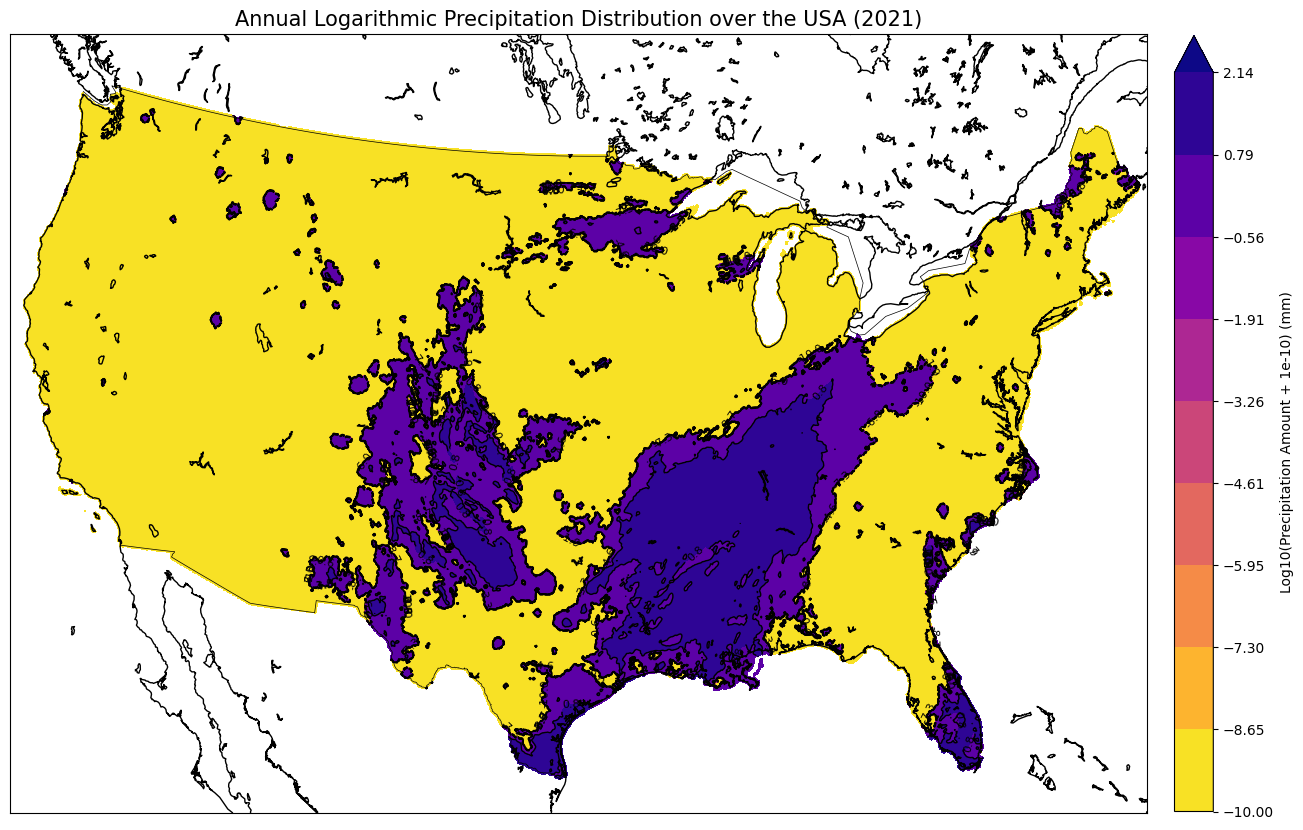

In [13]:
# logirithmic scale

import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Open the NetCDF file
file_path = './dotnc/raw/pr.nc'  # Update with your NetCDF file path
dataset = nc.Dataset(file_path)

# Assume 'lat', 'lon', and 'precipitation_amount' are the variable names in your NetCDF file
latitudes = dataset.variables['lat'][:]
longitudes = dataset.variables['lon'][:]
req_thing = 'precipitation_amount'

# req_thing = 'specific_humidity'
precipitation_amount = dataset.variables[req_thing][:]  # Adjust according to your file

# Select a specific time step (for example, the first time step)
precipitation_slice = precipitation_amount[0, :, :]  # Select the first time step

# Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
print('Latitudes shape:', latitudes.shape)
print('Longitudes shape:', longitudes.shape)
print('Precipitation shape:', precipitation_slice.shape)

# Create a Basemap instance
plt.figure(figsize=(14, 10))
m = Basemap(projection='lcc', resolution='i', 
            lat_0=37.5, lon_0=-96,
            llcrnrlon=-119, urcrnrlon=-64, 
            llcrnrlat=22, urcrnrlat=50)

# Draw coastlines, states, and country boundaries for context
m.drawcoastlines()
# m.drawstates()
m.drawcountries()

# Convert lat/lon to map projection coordinates
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)
x, y = m(lon_grid, lat_grid)

# Apply logarithmic scale; avoid log(0) by adding a small constant if necessary
log_precipitation_slice = np.log10(precipitation_slice + 1e-10)

# Define a colormap and contour levels for logarithmic precipitation
cmap = 'Blues'  # Use a blue-based colormap for intuitive rain representation
cmap = 'plasma_r'
levels = np.linspace(np.min(log_precipitation_slice), np.max(log_precipitation_slice), 10)  # Smoother contour levels

# Create filled contour map with the specified colormap and levels
contourf = m.contourf(x, y, log_precipitation_slice, levels=levels, cmap=cmap, extend='max')
contour = m.contour(x, y, log_precipitation_slice, levels=levels, colors='black', linewidths=1.0)

# Add color bar with better labeling
cbar = plt.colorbar(contourf, orientation='vertical', pad=0.02, shrink=0.8, label='Log10(Precipitation Amount + 1e-10) (mm)')
cbar.ax.tick_params(labelsize=10)

# Label the contours with precipitation values
plt.clabel(contour, inline=True, fontsize=8, fmt='%1.1f')

# Add a descriptive title with context
plt.title('Annual Logarithmic Precipitation Distribution over the USA (2021)', fontsize=15)

# Show plot
plt.tight_layout()
plt.show()

# Close the dataset
dataset.close()
